# Credit Card Default Payment Prediction

Name: Ferry Marcellus Suhendra


#### Problem
create a machine learning model to predict default payment.

### Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

### Data Loading
The data used in this modeling is taken from BigQuery database with the following query:

select limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

from bigquery-public-data.ml_datasets.credit_card_default

limit 29970

In [3]:
# Loading Dataframe
df=pd.read_csv('h8dsft_P1M1_Query.csv')
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1


In [4]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

There are no missing values in the dataset.

In [5]:
# checking numeric data values
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [6]:
# checking for duplicates
df.duplicated().sum()

# Removing duplicate data
df.drop_duplicates(inplace=True)

In [7]:
# renaming pay_0 to pay_1
df=df.rename(columns={'pay_0':'pay_1'})
df

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1


### Exploratory Data Analysis

<AxesSubplot:xlabel='default_payment_next_month', ylabel='count'>

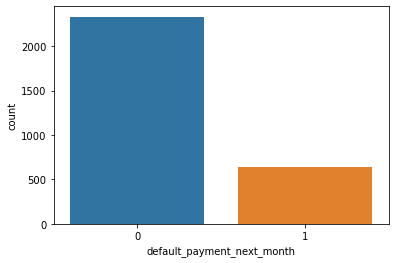

In [8]:
# Checking count of default payment next month
sns.countplot(x='default_payment_next_month',data=df)

The data show that there are significantly less data of credit card that defaults in the next month. the imbalance in the target data may affect the result of the model prediction, but it is still in a manageable level. Therefore, there will not be any target imbalance treatment for this modeling.

In [9]:
# checking for correlation with default payment within numeric columns
df.corr().nlargest(24, 'default_payment_next_month')['default_payment_next_month']

default_payment_next_month    1.000000
pay_1                         0.357185
pay_2                         0.288669
pay_3                         0.275608
pay_4                         0.255648
pay_5                         0.253161
pay_6                         0.237007
education_level               0.044745
age                           0.016883
bill_amt_6                    0.005994
bill_amt_5                    0.005807
bill_amt_2                    0.000751
bill_amt_3                   -0.001200
bill_amt_4                   -0.004844
bill_amt_1                   -0.006089
sex                          -0.021626
marital_status               -0.026193
pay_amt_4                    -0.053748
pay_amt_2                    -0.059307
pay_amt_5                    -0.066214
pay_amt_1                    -0.066221
pay_amt_6                    -0.067025
pay_amt_3                    -0.090318
limit_balance                -0.161868
Name: default_payment_next_month, dtype: float64

Default payment have a correlation with pay columns. 

<AxesSubplot:xlabel='pay_6', ylabel='count'>

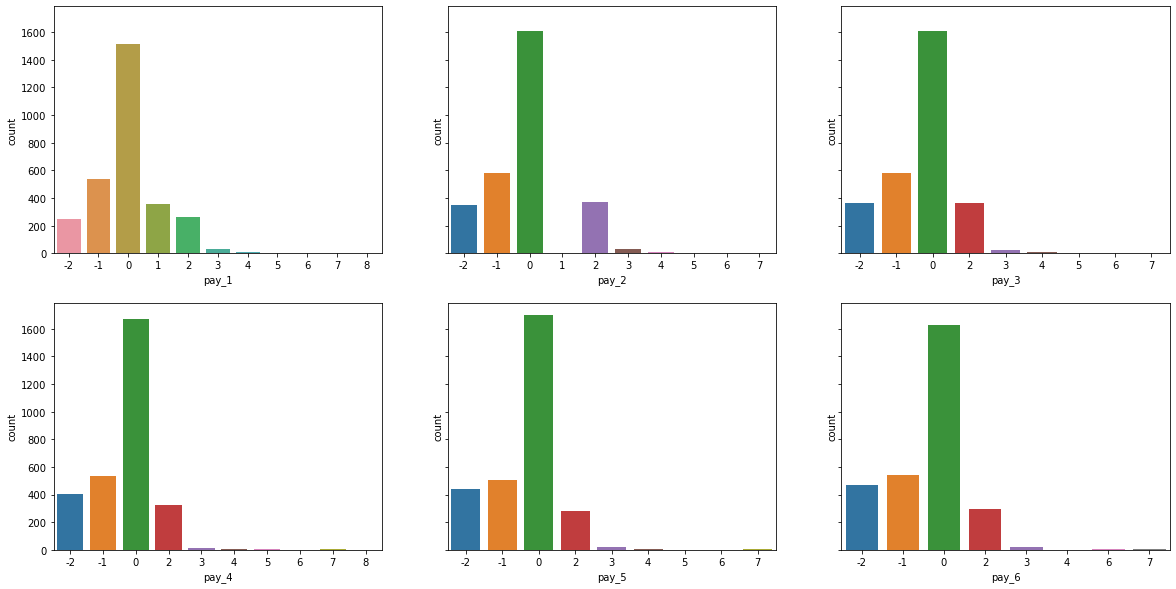

In [15]:
# checking pay column values
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
sns.countplot(ax=axes[0,0],x='pay_1',data=df)
sns.countplot(ax=axes[0,1],x='pay_2',data=df)
sns.countplot(ax=axes[0,2],x='pay_3',data=df)
sns.countplot(ax=axes[1,0],x='pay_4',data=df)
sns.countplot(ax=axes[1,1],x='pay_5',data=df)
sns.countplot(ax=axes[1,2],x='pay_6',data=df)



The data source states that the pay columns represent the status of credit card payment on a monthly basis going from september 2005 to april 2005. a negative value means that the payment was completed, a positive value shows late payment for the ammount of month the value shows, and a 0 means there is no payment to be made. from the graph it can be seen that most of the data are mostly credit cards with no due payments. this explaint the number of credit card without default payments.

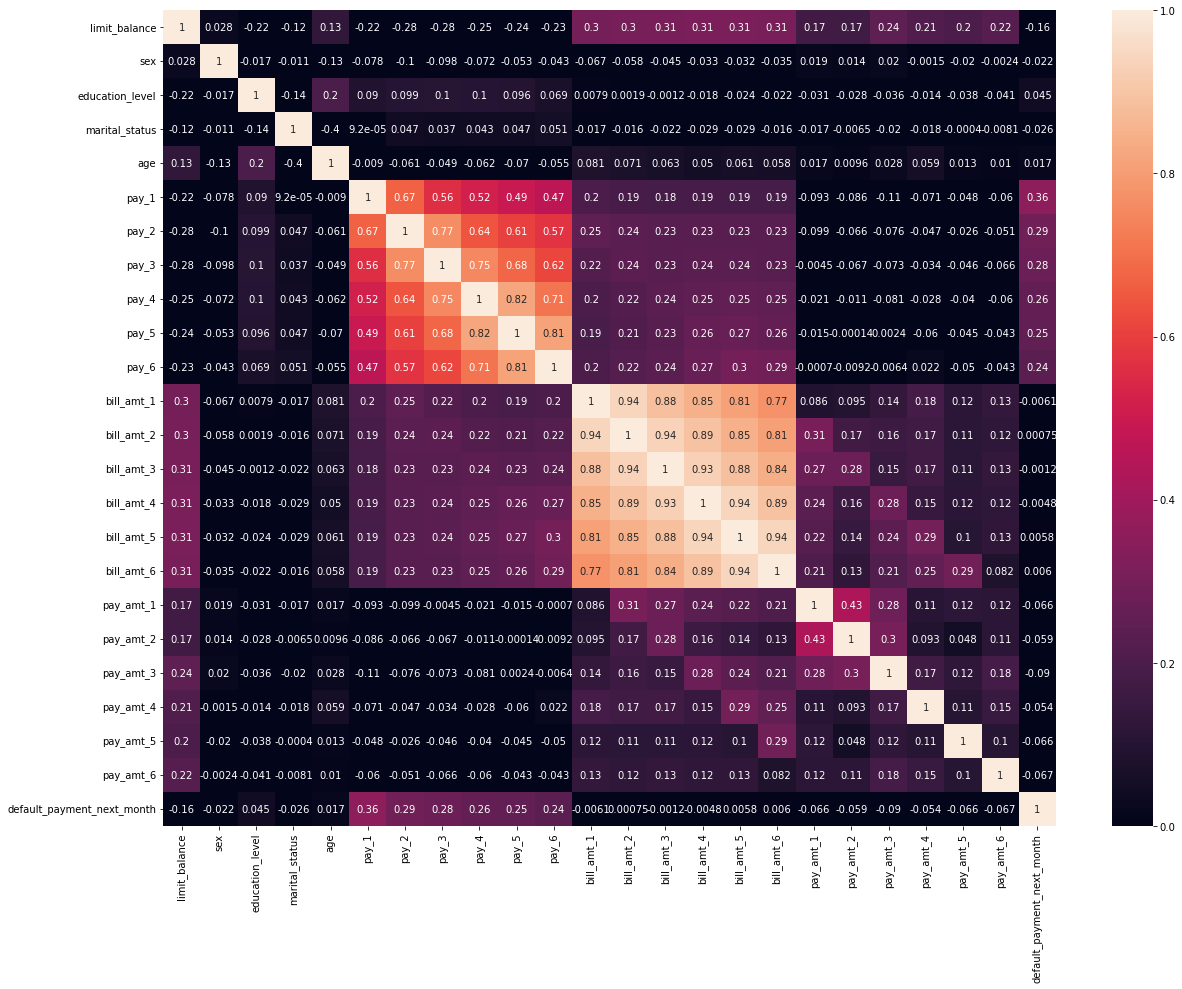

In [ ]:
#Heat mapping correlations
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot= True, vmin=0, vmax=1)
plt.show()

all pay columns and bill ammount columns have a strong correlation with similar columns. 

In [ ]:
#checking for multicolinearity
s = df[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]

vif=pd.DataFrame()
vif['features'] = s.columns
vif['VIF'] = [variance_inflation_factor(s, i) for i in range(s.shape[1])]

vif

,features,VIF
0,pay_1,1.838570
1,pay_2,3.114527
2,pay_3,3.399130
3,pay_4,4.080385
4,pay_5,4.805173
5,pay_6,3.176901


It is found there is no multicolinearity among the pay features.

### Data Preprocessing

In [ ]:
# separating inference data
df_inf = df.sample(10, random_state=69)
# reseting index
df_inf.reset_index(drop=True, inplace=True)
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,2,2,1,43,-1,-1,-1,-1,-1,...,3589,11151,1543,6776,2811,3589,11351,1543,1109,0
1,220000,2,2,1,33,-2,-2,-2,-2,-2,...,1341,8171,14253,8300,1590,1341,8171,14253,3513,0
2,160000,2,2,1,28,0,0,0,0,0,...,57757,59424,60631,2100,2100,2500,3000,2200,2200,0
3,420000,2,2,1,29,0,0,0,0,0,...,54763,59037,60290,2011,3000,20000,5000,2000,3000,0
4,130000,2,2,2,25,2,-1,-1,-1,-1,...,1298,550,-286,668,1200,1300,964,1698,60549,1
5,250000,2,1,2,30,-1,0,0,0,0,...,37329,26339,4836,5000,3500,15054,7885,4836,9655,0
6,360000,2,2,2,27,0,0,-1,-1,-1,...,1169,-1,-1,0,1150,1174,0,0,0,0
7,230000,1,3,2,28,0,-1,-1,-1,-1,...,18844,34983,53935,65722,20000,18844,34983,408,14574,0
8,210000,1,2,3,27,0,0,0,0,0,...,84365,86517,87296,3883,4000,3008,3500,3139,3373,0
9,50000,2,2,2,30,1,3,2,2,2,...,48439,49418,50326,0,2000,2000,1900,1900,1900,1


In [ ]:
# separating inferential data from dataframe
dftt = df.drop(df_inf.index)
# reseting index
dftt.reset_index(drop=True, inplace=True)
dftt

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,170000,2,2,2,27,0,0,0,0,0,...,70788,68927,70678,2932,3000,2500,3000,2900,2918,0
1,120000,2,2,2,37,0,0,0,0,0,...,99927,101541,103379,4848,4877,3625,3600,3751,3900,0
2,110000,2,2,2,52,0,0,0,0,0,...,41346,42013,42890,1935,1971,1986,1653,1706,1714,0
3,20000,1,2,2,24,0,0,0,0,0,...,9769,10057,10346,1300,1500,1600,600,600,700,1
4,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2950,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2951,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2952,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1


In [ ]:
# Splitting features and target

x = dftt.drop('default_payment_next_month', axis=1) 
y = dftt['default_payment_next_month']
x

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,170000,2,2,2,27,0,0,0,0,0,...,80131,70788,68927,70678,2932,3000,2500,3000,2900,2918
1,120000,2,2,2,37,0,0,0,0,0,...,99051,99927,101541,103379,4848,4877,3625,3600,3751,3900
2,110000,2,2,2,52,0,0,0,0,0,...,40331,41346,42013,42890,1935,1971,1986,1653,1706,1714
3,20000,1,2,2,24,0,0,0,0,0,...,8473,9769,10057,10346,1300,1500,1600,600,600,700
4,230000,1,2,1,41,0,0,0,0,0,...,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,210000,2,2,1,39,-1,-1,-1,-1,-2,...,28428,0,0,12000,0,28428,0,0,12000,33664
2950,280000,2,1,1,41,2,-1,-1,-1,-2,...,486,0,0,244,6859,486,0,0,244,0
2951,80000,1,1,2,28,1,-1,-1,-1,-2,...,207,0,0,0,47,207,0,0,0,0
2952,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,0,6753,2920,0,0,0,6753,0


### Feature selection

for this modeling, the columns pay_1, 2,3,4,5,6 these data represent the presence of credit card payment on a monsthly basis with negative values mean the credit card payment was paid that month and positive values means a delay of payments in months.

In [ ]:
# selecting features
x=x[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]
df_inf=df_inf[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_payment_next_month']]
x

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
2949,-1,-1,-1,-1,-2,-1
2950,2,-1,-1,-1,-2,-1
2951,1,-1,-1,-1,-2,-2
2952,1,-1,-1,-2,-2,-1


In [ ]:
# Splitting training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

print('Train Size : ', x_train.shape)
print('Test Size  : ', x_test.shape)

Train Size :  (2363, 6)
Test Size  :  (591, 6)


### Model Definition, Training, & hyperparameter tuning

in this modeling, multiple model will be created. a logistical regression model, SVM model,decision tree model,random forest, KNN model, naive bayes model, and AdaBoost model.

In [ ]:
# Defining Logistic Regression Model
log_model = LogisticRegression()
# Defining SVM Classifier Model
svm_model = SVC()
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier(random_state=69)
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier(random_state=69)
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining naive bayes Model
nb_model = GaussianNB()
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier(
    DecisionTreeClassifier(),
    algorithm="SAMME.R", 
    random_state=69)

# training model
for model in [log_model,svm_model,dt_model,rf_model,knn_model,nb_model,ada_model]:
    model.fit(x_train,y_train)

In [ ]:
# checking cross validation score
cv_log_model = cross_val_score(log_model, x_train, y_train, cv=3, scoring="accuracy")
cv_svm_model = cross_val_score(svm_model, x_train, y_train, cv=3, scoring="accuracy")
cv_dt_model = cross_val_score(dt_model, x_train, y_train, cv=3, scoring="accuracy")
cv_rf_model = cross_val_score(rf_model, x_train, y_train, cv=3, scoring="accuracy")
cv_knn_model = cross_val_score(knn_model, x_train, y_train, cv=3, scoring="accuracy")
cv_nb_model = cross_val_score(nb_model, x_train, y_train, cv=3, scoring="accuracy")
cv_ada_model = cross_val_score(ada_model, x_train, y_train, cv=3, scoring="accuracy")
cvh=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model']):
    print(name)
    print('Accuracy - All - Cross Validation  : ', cv)
    print('Accuracy - Mean - Cross Validation : ', cv.mean())
    print('Accuracy - Std - Cross Validation  : ', cv.std())
    print('Accuracy - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cvh:
        cvh= cv.mean()
        nameh=name
    else:
        continue
print ('best model:', nameh)
print('cross-val mean:', cvh)

log_model
Accuracy - All - Cross Validation  :  [0.8286802  0.82233503 0.81321474]
Accuracy - Mean - Cross Validation :  0.8214099893145166
Accuracy - Std - Cross Validation  :  0.006347540695991611
Accuracy - Range of Test-Set       :  0.815062448618525 - 0.8277575300105082
--------------------------------------------------
svm_model
Accuracy - All - Cross Validation  :  [0.83121827 0.82741117 0.82083863]
Accuracy - Mean - Cross Validation :  0.8264893564414976
Accuracy - Std - Cross Validation  :  0.004287312028565303
Accuracy - Range of Test-Set       :  0.8222020444129323 - 0.8307766684700628
--------------------------------------------------
dt_model
Accuracy - All - Cross Validation  :  [0.79568528 0.80964467 0.79796696]
Accuracy - Mean - Cross Validation :  0.8010989707965952
Accuracy - Std - Cross Validation  :  0.006114095857616776
Accuracy - Range of Test-Set       :  0.7949848749389784 - 0.807213066654212
--------------------------------------------------
rf_model
Accuracy -

Based of the cross validation score, the best model to use is the SVM model. the hyperparameters of this model will be tuned.

In [ ]:
# defining hyperparameters for tuning
param_grid = {
    'C': [0.05,0.25,0.5,1,1.5,2],
    'kernel':['linear','poly','rbf','sigmoid'],
    'max_iter': [-1,1000,10000,100000],
    'gamma': ['scale','auto'], 
}

param_grid


{'C': [0.05, 0.25, 0.5, 1, 1.5, 2],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'max_iter': [-1, 1000, 10000, 100000],
 'gamma': ['scale', 'auto']}

In [ ]:
# Training using grid search
svm_gridcv = GridSearchCV(estimator=SVC(),
                         param_grid=param_grid,
                         cv=3,
                         n_jobs=-1,
                         verbose=2)

svm_gridcv.fit(x_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.05, 0.25, 0.5, 1, 1.5, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [-1, 1000, 10000, 100000]},
             verbose=2)

In [ ]:
# Displaying best hyperparameters
svm_gridcv.best_params_

{'C': 1.5, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1}

most of the best hyperparameters are the default valuse with the exception of C value.

In [ ]:
# retrieving the best model
svm_gridcv_best = svm_gridcv.best_estimator_

### Model Evaluation

In [ ]:
# Evaluating the default svm model
# creating prediction data
svm_y_pred_train = svm_model.predict(x_train)
svm_y_pred_test = svm_model.predict(x_test)
# Evaluating the model
print("Training")
print(classification_report(y_train,svm_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,svm_y_pred_test))


Training
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1849
           1       0.74      0.40      0.52       514

    accuracy                           0.84      2363
   macro avg       0.79      0.68      0.71      2363
weighted avg       0.83      0.84      0.82      2363



Test
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       470
           1       0.74      0.49      0.59       121

    accuracy                           0.86       591
   macro avg       0.81      0.72      0.75       591
weighted avg       0.85      0.86      0.85       591



c:\Users\Ferry Marcellus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


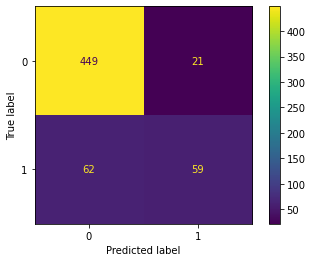

In [ ]:
# Plotting confusion matrix
plot_confusion_matrix(svm_model, x_test, y_test) 

In [ ]:
# Evaluating the tuned SVM model
# creating prediction data
best_y_pred_train = svm_gridcv_best.predict(x_train)
best_y_pred_test = svm_gridcv_best.predict(x_test)
# Evaluating the model
print("Training")
print(classification_report(y_train,best_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,best_y_pred_test))

Training
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1849
           1       0.74      0.40      0.52       514

    accuracy                           0.84      2363
   macro avg       0.80      0.68      0.71      2363
weighted avg       0.83      0.84      0.82      2363



Test
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       470
           1       0.74      0.49      0.59       121

    accuracy                           0.86       591
   macro avg       0.81      0.72      0.75       591
weighted avg       0.85      0.86      0.85       591



c:\Users\Ferry Marcellus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


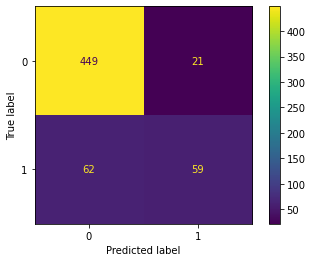

In [ ]:
# Plotting confusion matrix
plot_confusion_matrix(svm_gridcv_best, x_test, y_test) 

By comparing the results of predictor model before and after hyperparameter tuning, it is found that there are almost no noticeable difference in the result of both models. this is supported by the fact that the best hyperparameters found by grid searching is mostly similar with the exception of C value.

the resulting model seems to have a hard time predicting True Default payments. this may happen due to the imbalance of default payments values in the dataset.

### Model Inference

In [ ]:
# selecting features of inference data
df_inf_a= df_inf[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]
# displaying inference data
df_inf_a

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,-1,-1,-1,-1,-1,-1
1,-2,-2,-2,-2,-2,-2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,2,-1,-1,-1,-1,-1
5,-1,0,0,0,0,-1
6,0,0,-1,-1,-1,-2
7,0,-1,-1,-1,-1,0
8,0,0,0,0,0,0
9,1,3,2,2,2,2


In [ ]:
# Predicting default payment
svc_y_pred_inf = svm_gridcv_best.predict(df_inf_a)
svc_y_pred_inf_df = pd.DataFrame(svc_y_pred_inf, columns=['SVM Prediction'])
print(svc_y_pred_inf_df)

   SVM Prediction
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               1


In [ ]:
# Joining inference data with predictions
pd.concat([df_inf,svc_y_pred_inf_df], axis=1)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month,SVM Prediction
0,-1,-1,-1,-1,-1,-1,0,0
1,-2,-2,-2,-2,-2,-2,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,2,-1,-1,-1,-1,-1,1,0
5,-1,0,0,0,0,-1,0,0
6,0,0,-1,-1,-1,-2,0,0
7,0,-1,-1,-1,-1,0,0,0
8,0,0,0,0,0,0,0,0
9,1,3,2,2,2,2,1,1


result of model inference shows that the final model have a harder time predicting True/1 default payment value.

### Conclusions
1. Prediction model is created using pay columns as features.
2. Cross validation found that SVM model works best among the tested models in their default hyperparameters.
3. the optimal hyperparameters for the SVM model is very similar to its default values. therefore the result of the model after hyperparameter tuning and before performs similarly.
4. resulting final model can predict default payment decently but seems to struggle with identifying True/1 value. This result may happen due to the imbalance within the target data.
5. Future improvements can be done by balancing the target data, introducing new features to the model, or by tuning a different modeling algorithm.